In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## Setting

If you ever used City Bikes in Helsinki, you know that you are entitled to unlimited 30 minute rides, provided you **CHECK-IN to a City Bike station before expiry of your 30-minute ride**. If you exceed 30 minutes there is a Euro charge. Thus, it is easier to check in every 20 minutes rather than risking exceeding the 30 minute limit. Riders usually plan their trips, but empty docks on the stations can literally ruin the whole experience...

In [2]:
with open('consolidated_full.json', 'r') as f:
    datastore = json.load(f)

In [3]:
# checking the keys 

In [4]:
datastore['bike_stations'][0]['bikes'][0]

9

In [8]:
datastore['timestamps'][:10]

[1568490157,
 1568490457,
 1568490758,
 1568491058,
 1568491358,
 1568491658,
 1568491958,
 1568492258,
 1568492558,
 1568492858]

In [7]:
datastore.keys()

dict_keys(['timestamps', 'bike_stations', 'scooters'])

We have deleted from the data bike stations, which:
+ appeared only once or twice in our data 
+ had size zero

In [8]:
# scooters is list of lists 
# bikes is a list of stations, each station is a dictionary

In [9]:
# checking dimensions

In [10]:
print('Scooters: ', np.array(datastore['scooters']).shape)
print('Bikes: ', np.array(datastore['bike_stations'][0]['bikes']).shape)

Scooters:  (4817,)
Bikes:  (4817,)


In [11]:
len(datastore['bike_stations'])

455

In [12]:
# data representation 

In [13]:
print(datastore['scooters'][0][0])
# print(datastore['bike_stations'][0])
# {'uid': '1215', 'name': 'Luhtimäki', 'latitude': 60.2689544, 'longitude': 24.8201851, 
# 'size': 11, 'bikes': [9, 9, 9, 9, 9, 9, 9, 9... continues for all datastamps

[60.1710090637207, 24.918569564819336]


In [14]:
# creating list with bike stations

In [24]:
bikes = []
for i in range(len(datastore['bike_stations'])):
    single = [datastore['bike_stations'][i]['latitude'], datastore['bike_stations'][i]['longitude']]
    bikes.append(single)

In [25]:
# 455 bike stations
# 4817 timestamps 
# we can create a df with the number of bikes for each timestamp

In [26]:
rows = ['s_' + i['uid'] for i in datastore['bike_stations']]

In [27]:
list_data = [i['bikes'] for i in datastore['bike_stations']]

In [28]:
big_df = pd.DataFrame(data=list_data, index = rows).T

In [29]:
big_df.insert(loc=0, column='time', value=datastore['timestamps'])

In [30]:
# coverting unix format

In [31]:
big_df['time'] = big_df['time'].apply(lambda x: datetime.utcfromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))

In [32]:
# adding latitude and longitude

In [33]:
lon_lat = pd.DataFrame(bikes, index = rows, columns=['lat', 'lon']).T

In [34]:
big_df = lon_lat.append(big_df, sort=False)

In [35]:
big_df.tail()

,s_1215,s_1213,s_1211,s_1219,s_1217,s_1227,s_1105,s_1225,s_1103,s_1223,...,s_163,s_284,s_285,s_286,s_290,s_291,s_292,s_900,s_901,time
4812,8.0,4.0,11.0,6.0,14.0,12.0,15.0,5.0,14.0,9.0,...,0.0,4.0,1.0,3.0,0.0,3.0,1.0,12.0,12.0,2019-10-01 12:59:10
4813,9.0,4.0,11.0,6.0,14.0,12.0,15.0,5.0,14.0,9.0,...,1.0,5.0,1.0,3.0,0.0,3.0,1.0,12.0,12.0,2019-10-01 13:04:10
4814,9.0,4.0,11.0,6.0,14.0,12.0,15.0,5.0,14.0,9.0,...,1.0,4.0,1.0,3.0,0.0,3.0,1.0,11.0,12.0,2019-10-01 13:09:10
4815,9.0,4.0,11.0,6.0,14.0,12.0,15.0,5.0,14.0,9.0,...,1.0,4.0,1.0,3.0,0.0,3.0,1.0,11.0,12.0,2019-10-01 13:14:10
4816,9.0,4.0,11.0,5.0,14.0,12.0,15.0,5.0,14.0,9.0,...,1.0,4.0,1.0,3.0,0.0,3.0,2.0,10.0,12.0,2019-10-01 13:19:10


## Plotting

In [15]:
import folium
from folium.plugins import HeatMap
from folium.plugins import TimestampedGeoJson
from folium.plugins import HeatMapWithTime

### Heatmaps for scooters

In [16]:
# creating a Map instance
m_scooters_heat = folium.Map(location=[60.17, 24.9], 
                             tiles="CartoDB dark_matter", 
                             zoom_start=13, 
                             control_scale=True)

In [17]:
# adding heatmap to map instance
HeatMap(datastore['scooters'][0]).add_to(m_scooters_heat)

In [18]:
# alternative syntax:
#m_scooters_heat.add_child(HeatMap(datastore['scooters'][0], radius=15))

In [19]:
m_scooters_heat

### Maps for bikes

In [31]:
# plotting bikes for the first timestamp, experiment

In [20]:
num_1 = []
for i in range(len(datastore['bike_stations'])):
    single = datastore['bike_stations'][i]['bikes']
    num_1.append(single[0])

In [21]:
size_1 = []
for i in range(len(datastore['bike_stations'])):
    single = datastore['bike_stations'][i]['size']
    size_1.append(single)

In [36]:
df = pd.DataFrame(bikes, columns=['lat', 'lon'])

In [37]:
df['size'] = size_1

In [38]:
df['number'] = num_1

In [39]:
df['adj_num'] = df['number'] * 10 / df['size']

In [40]:
df['marker_color'] = pd.cut(df['adj_num'], bins=3, labels=['blue', 'orange', 'red'])

In [41]:
df.head()

,lat,lon,size,number,adj_num,marker_color
0,60.268954,24.820185,11,9,8.181818,red
1,60.279606,24.815069,10,6,6.000000,orange
2,60.277978,24.821893,12,8,6.666667,orange
3,60.301220,24.856554,18,12,6.666667,orange
4,60.294825,24.844223,20,14,7.000000,red


In [42]:
m_bikes = folium.Map(location=[60.17, 24.9],
                     zoom_start=12, 
                     tiles="CartoDB dark_matter",
                     control_scale=True)

In [43]:
for index, row in df.iterrows():
    radius = row['adj_num']
    popup_text = """number of bikes: {}"""
    popup_text = popup_text.format(row["number"])   # adding interactive text (click on the marker to see)
    folium.CircleMarker([row['lat'], row['lon']],
                    radius=radius, color=row['marker_color'], fill=True, popup=popup_text).add_to(m_bikes)

In [44]:
m_bikes

### Adding time to our maps

In [32]:
# creating an interactive heat map for scooters with timestamps

In [33]:
m_scooters_heat_with_time = folium.Map(location=[60.17, 24.9], 
                             tiles="CartoDB dark_matter", 
                             zoom_start=13, 
                             control_scale=True)

In [207]:
HeatMapWithTime(datastore['scooters'][:2000:12], 
               index = list(map(lambda x: datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'), 
                                datastore['timestamps'][:2000:12]))).add_to(m_scooters_heat_with_time)

In [208]:
m_scooters_heat_with_time.save('scooters.html')

In [209]:
# creating an interactive map for bikes with timestamps

In [213]:
m_bikes_with_time = folium.Map(location=[60.22, 24.92],
                             tiles="CartoDB dark_matter",
                             zoom_start=12,
                             control_scale=True)

In [214]:
lats = list(map(lambda x: x['latitude'], datastore['bike_stations']))
lons = list(map(lambda x: x['longitude'], datastore['bike_stations']))
bikes = list(map(lambda x: x['bikes'][::12], datastore['bike_stations']))
empties = list(map(lambda x: x['empty_slots'][::12], datastore['bike_stations']))
times = datastore['timestamps'][::12]
features = []
for lat, lon, bs, es in zip(lats, lons, bikes, empties):
    for t, b, e in zip(times, bs, es):
        if e:
            rt = b/e
            x = rt/(rt+1)
        else:
            x = 1.0
        if x > 0.5:
            r = int((x-0.5)*2*255)
            b, g = 255-r, 0
            g = b
        else:
            g = int(x*2*255)
            b, r = 255-g, 0
            r = b
        c = "#{:0<2X}{:0<2X}{:0<2X}".format(r, g, 0)
        features.append({
             'type': 'Feature',
             'geometry': {
               'type': 'MultiPoint',
               'coordinates': [[lon,lat]]
               },
             'properties': {
               'times': [t*1000],
                'style': {'color': c},
                'icon': 'circle',
                        'iconstyle': {
                            'radius': 4,
                            'stroke': True,
                            'fillColor': c,
                            'fillOpacity': 1.0
                        }
               }
             })

In [215]:
TimestampedGeoJson({'type': 'FeatureCollection','features': features}, 
                   auto_play=False, 
                   loop=False, 
                   period='PT1H', 
                   duration='PT1H').add_to(m_bikes_with_time)

In [216]:
m_bikes_with_time.save('bikes.html')

### Problematic bike stations

In [217]:
import matplotlib.pyplot as plt

In [218]:
no_bikes_list = list(map(lambda x: x['bikes'].count(0), datastore['bike_stations']))

In [219]:
# stations which are empty more than half of the time

In [220]:
empty_stations = []
for i in range(len(no_bikes_list)):
    if no_bikes_list[i] > 2000:
        empty_stations.append(i)

In [221]:
empty_stations

[319]

In [222]:
# stations which are completely full more than half of the time

In [223]:
empty_slots_list = list(map(lambda x: x['empty_slots'].count(0), datastore['bike_stations']))

In [224]:
full_stations = []
for i in range(len(empty_slots_list)):
    if empty_slots_list[i] > 2000:
        full_stations.append(i)

In [225]:
full_stations

[0, 2, 3, 5, 10, 13, 46, 52, 63, 64, 242]

In [252]:
problematic_stations = folium.Map(location=[60.17, 24.9],
                     zoom_start=13, 
                     tiles="CartoDB dark_matter",
                     control_scale=True)

In [253]:
folium.CircleMarker(
    location=[datastore_full['bike_stations'][323]['latitude'], datastore_full['bike_stations'][323]['longitude']], 
    color = 'red', 
    radius = 15,
    popup = 'Name: Ruutikatu, Size: 11'
    ).add_to(problematic_stations)

In [254]:
locations_full = []
names_full = []
size_full = []
for i in full_stations:
    locations_full.append([datastore_full['bike_stations'][i]['latitude'], datastore_full['bike_stations'][i]['longitude']])
    names_full.append(datastore_full['bike_stations'][i]['name'])
    size_full.append(datastore_full['bike_stations'][i]['size'])

In [255]:
for i in range(len(locations_full)):
    folium.CircleMarker(
    location=locations_full[i],
    popup = ('Name: ' + names_full[i] + ', ' + 'Size: ' + str(size_full[i]))
    ).add_to(problematic_stations)

In [256]:
problematic_stations

In [230]:
def plot_bikes(df, x, y, title="", xlabel='Date', ylabel='Number of bikes', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:cyan')
    plt.xticks([])
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

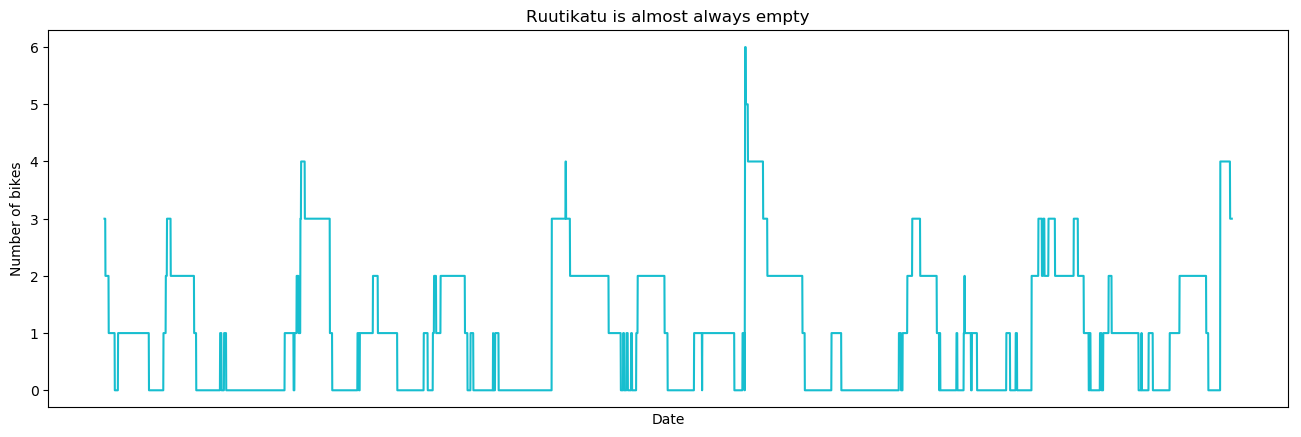

In [232]:
plot_bikes(big_df.iloc[2:,], x=big_df.iloc[2:,].time, y=big_df.iloc[2:,].s_767, title='Ruutikatu is almost always empty')   

The following stations have zero empty slots most of the time. According to the map though they dont look full up to maximum size. It may be due to the issues when:
+ you cant push the bike all the way into an open dock
+ or you push but there are no beeps, indicating that it's locked properly
+ or the dock is occupied by bike out of service

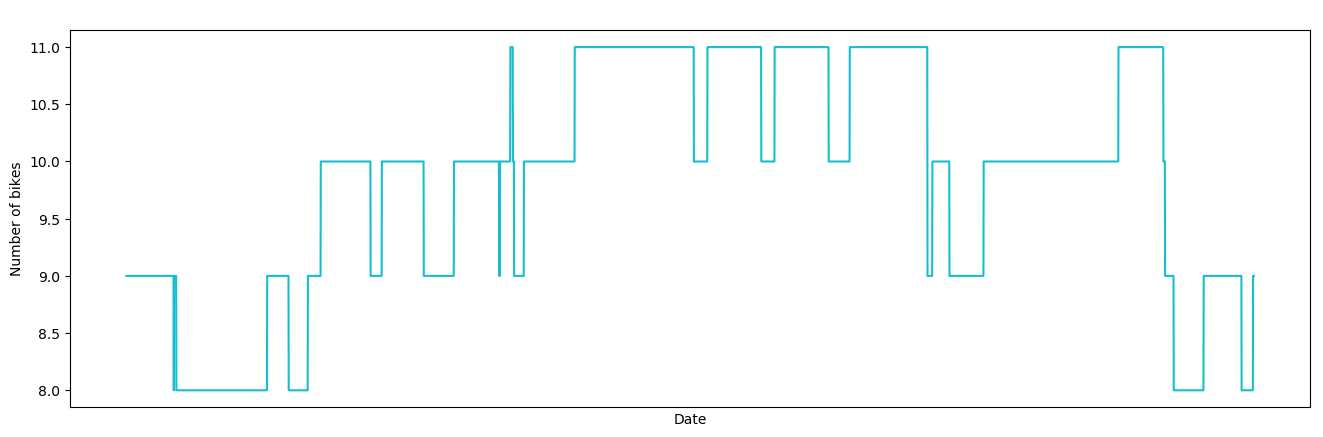

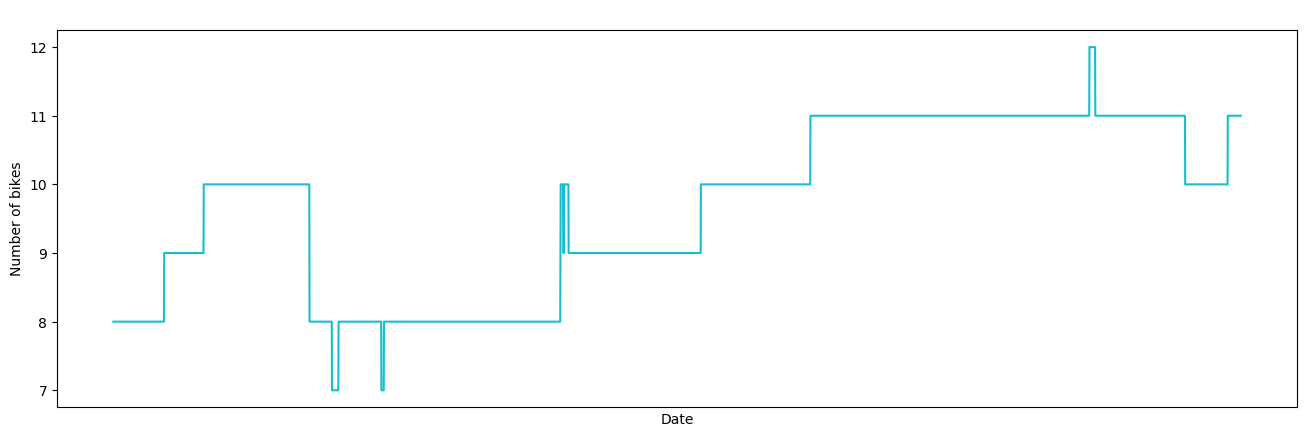

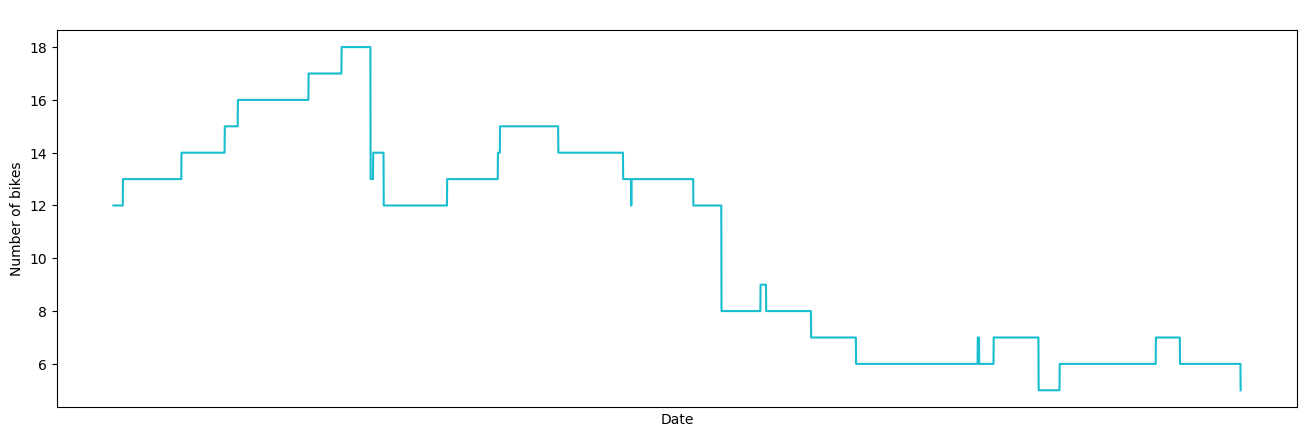

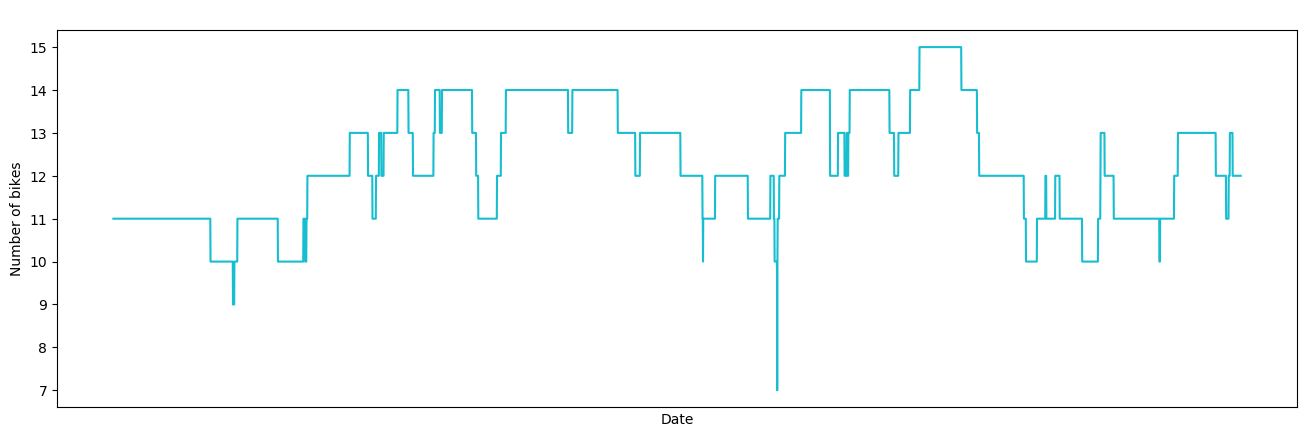

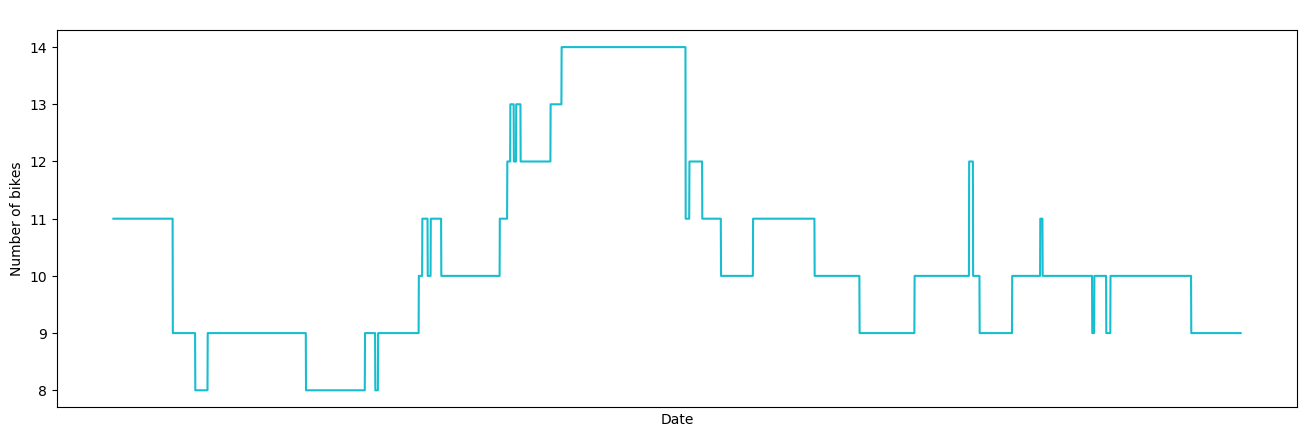

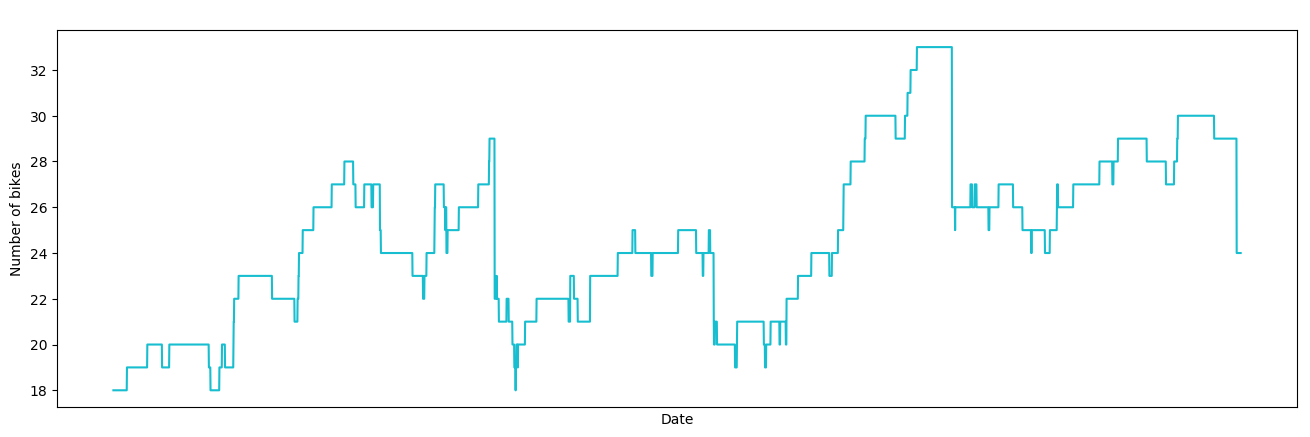

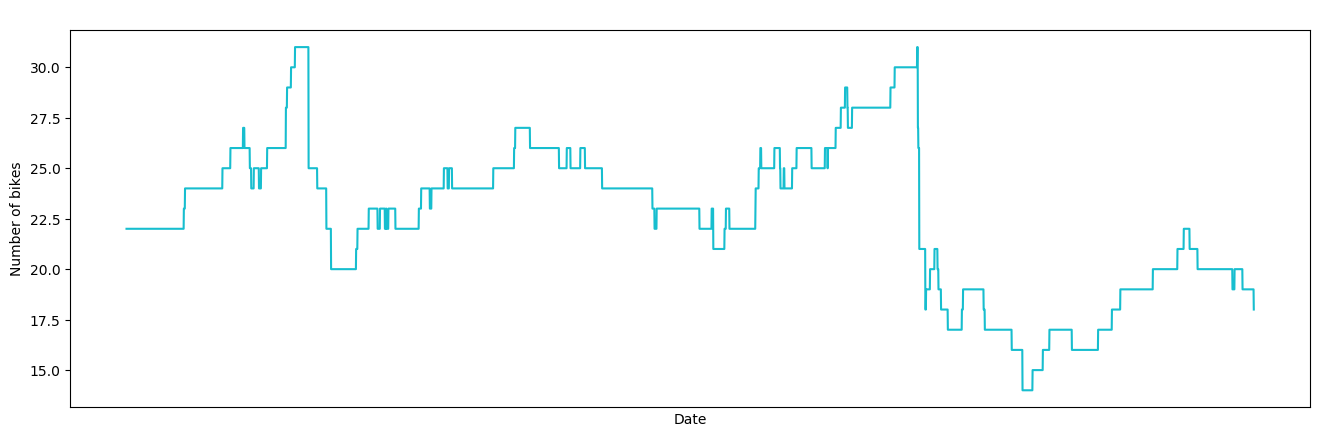

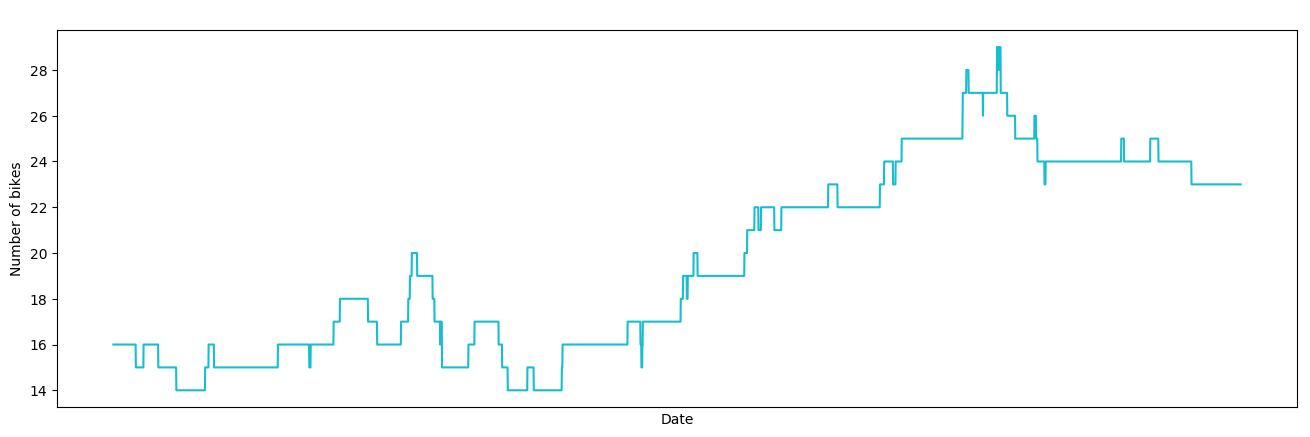

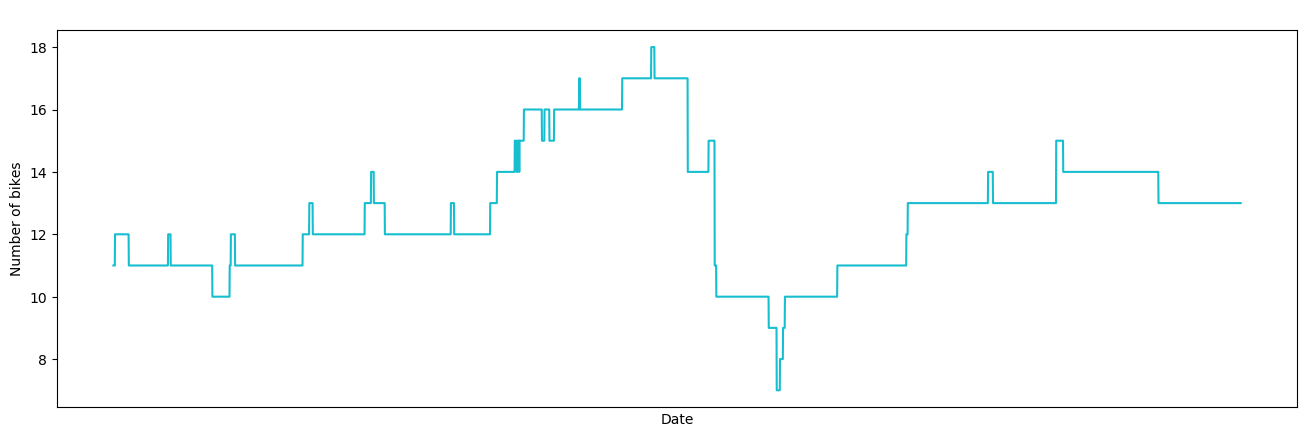

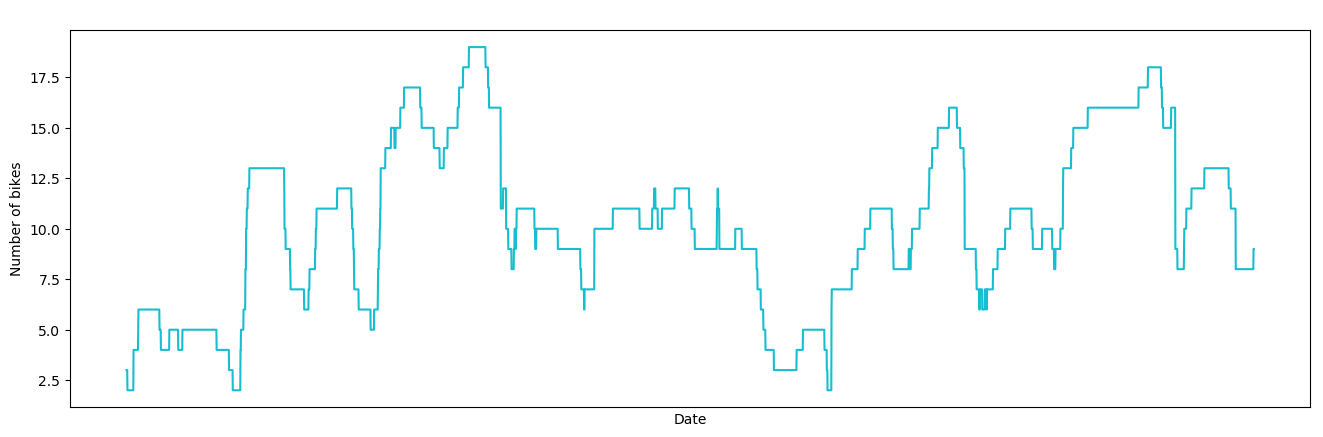

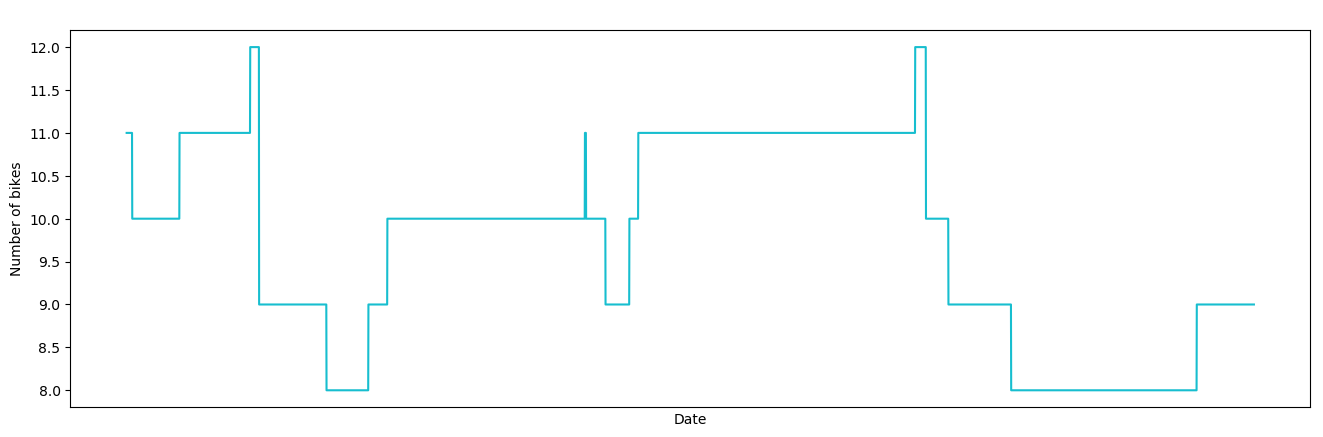

In [249]:
for i in full_stations:
    plot_bikes(datastore['bike_stations'][i]['bikes'], x=big_df.iloc[2:,].time, y=datastore['bike_stations'][i]['bikes'], title=' ')    

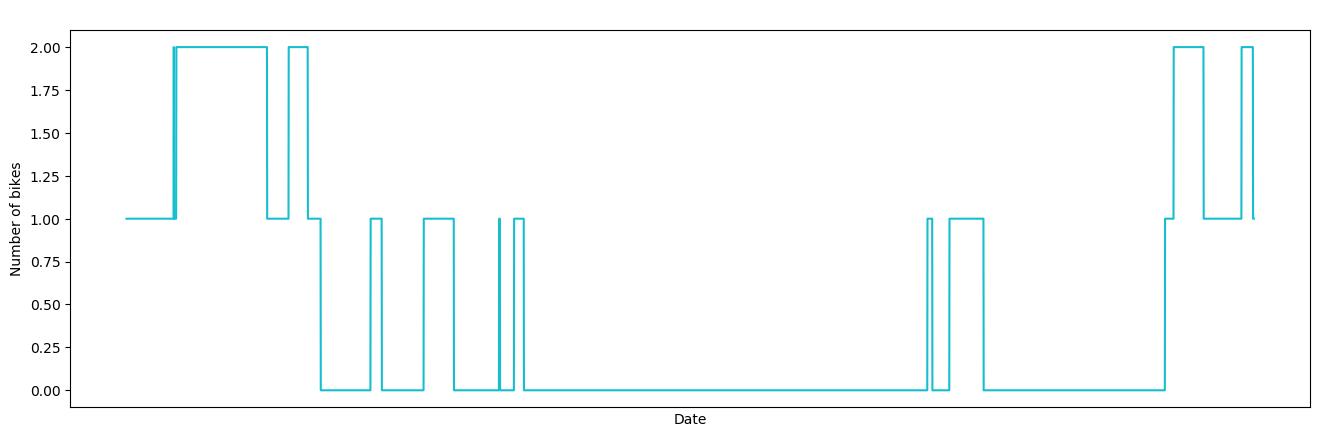

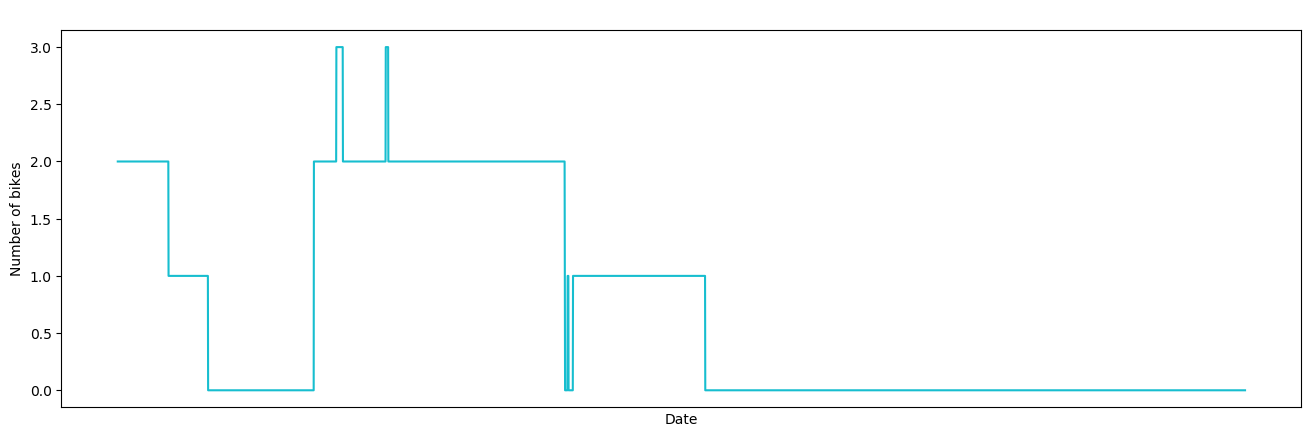

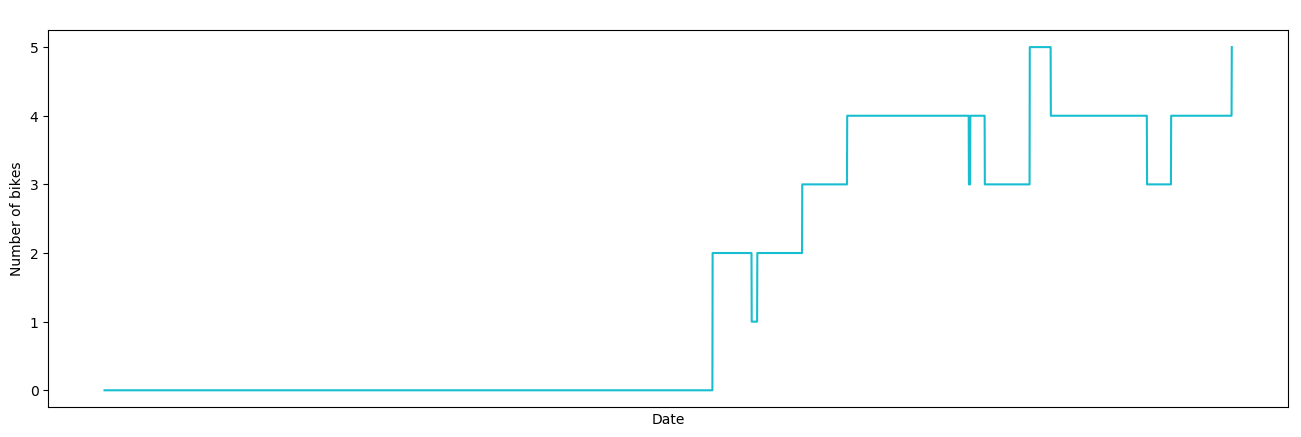

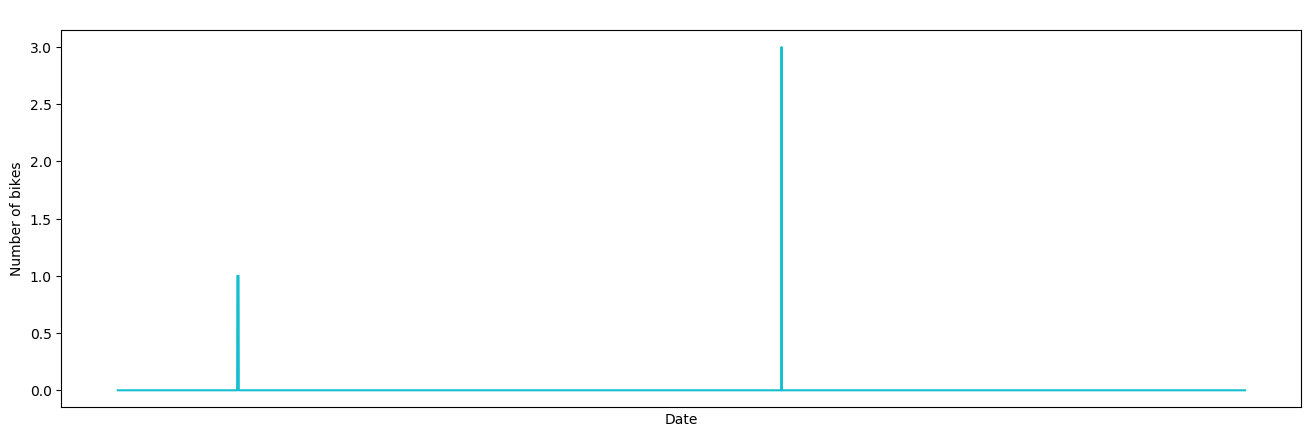

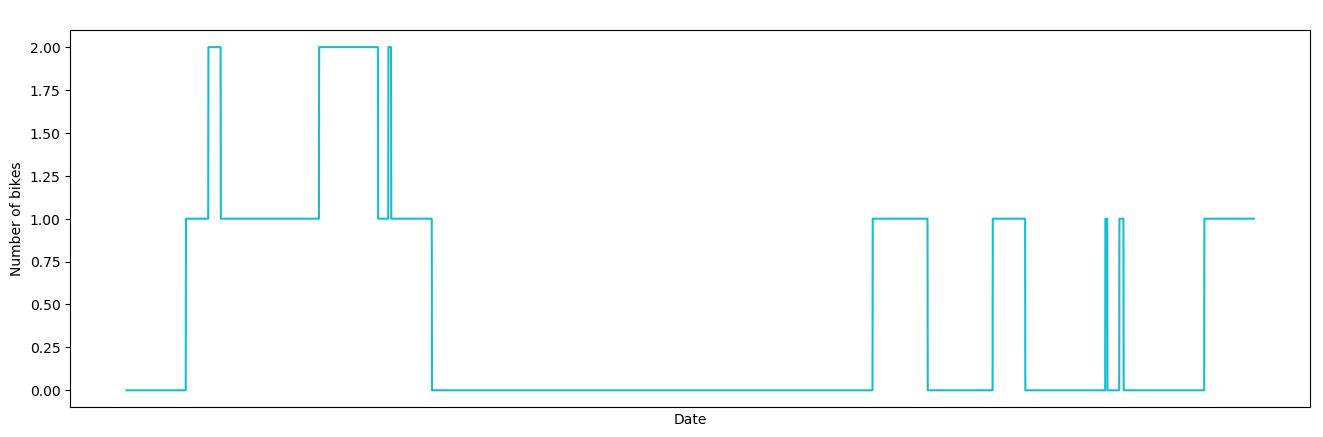

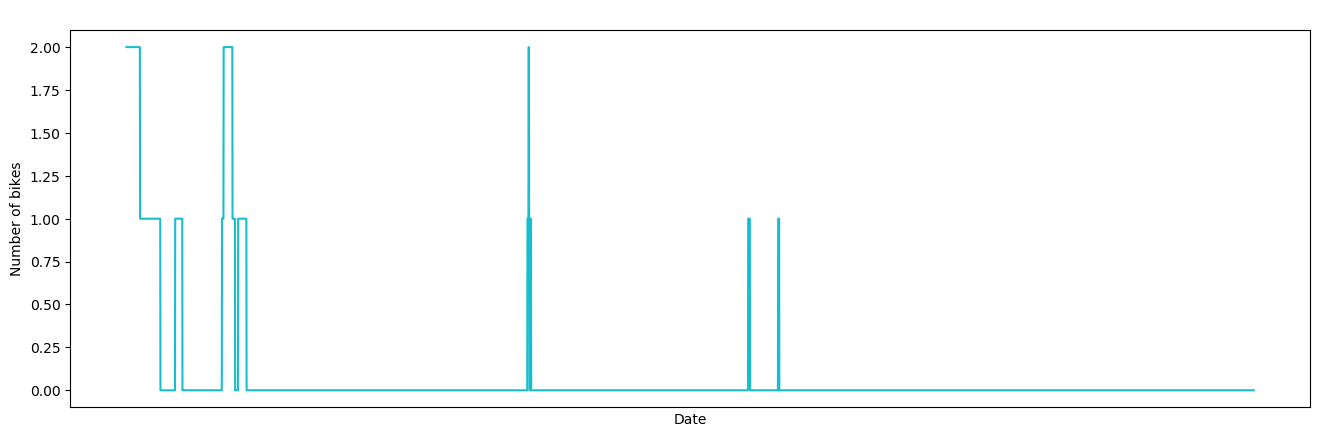

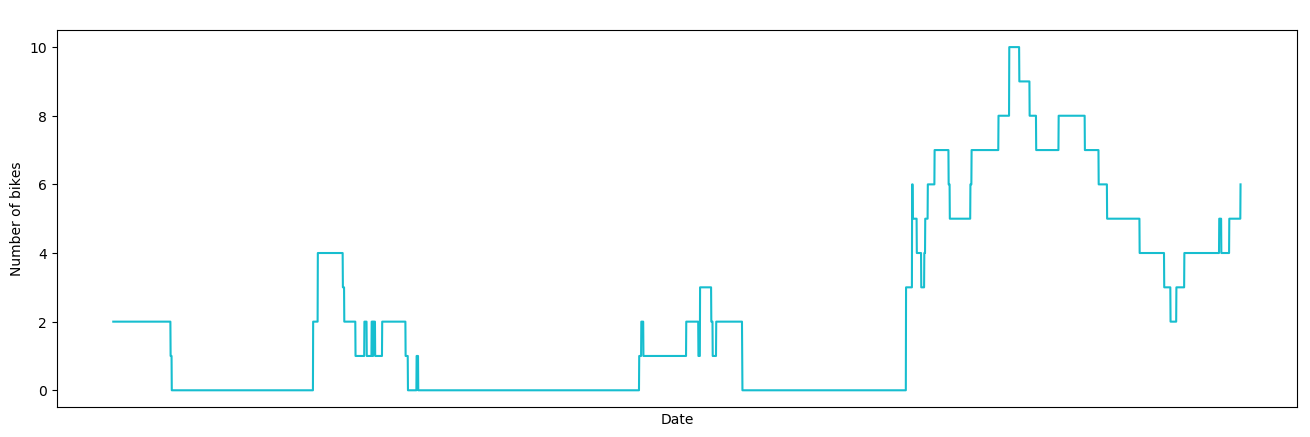

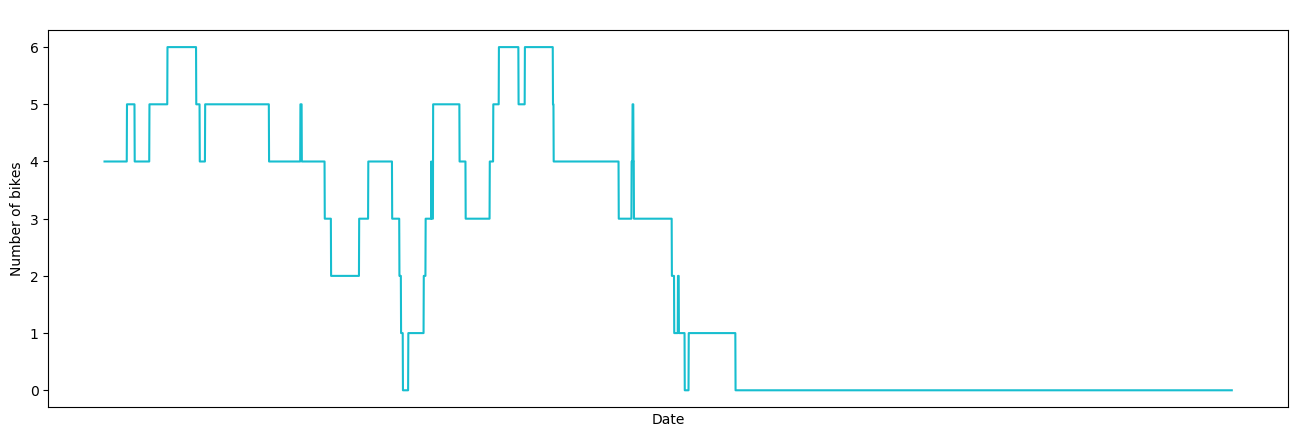

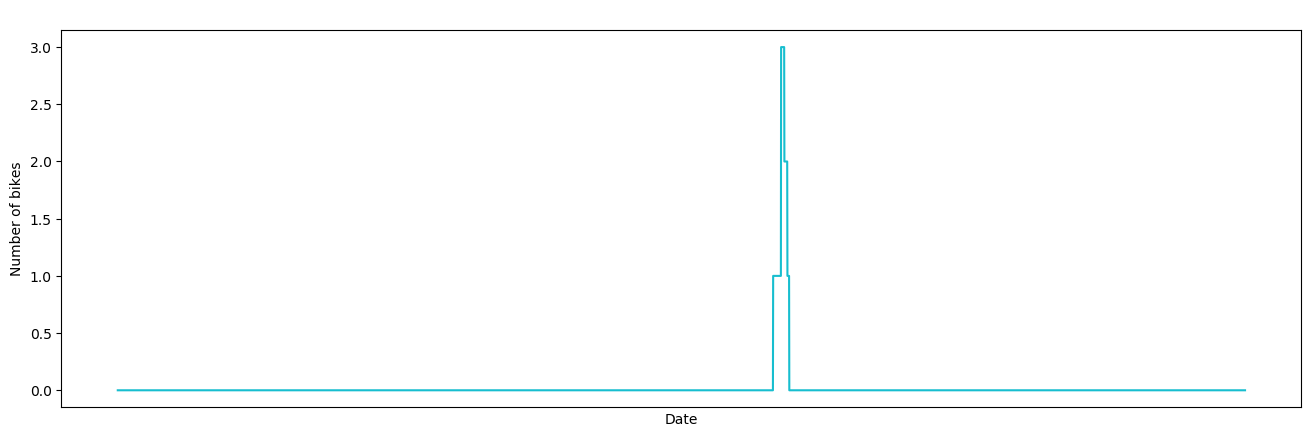

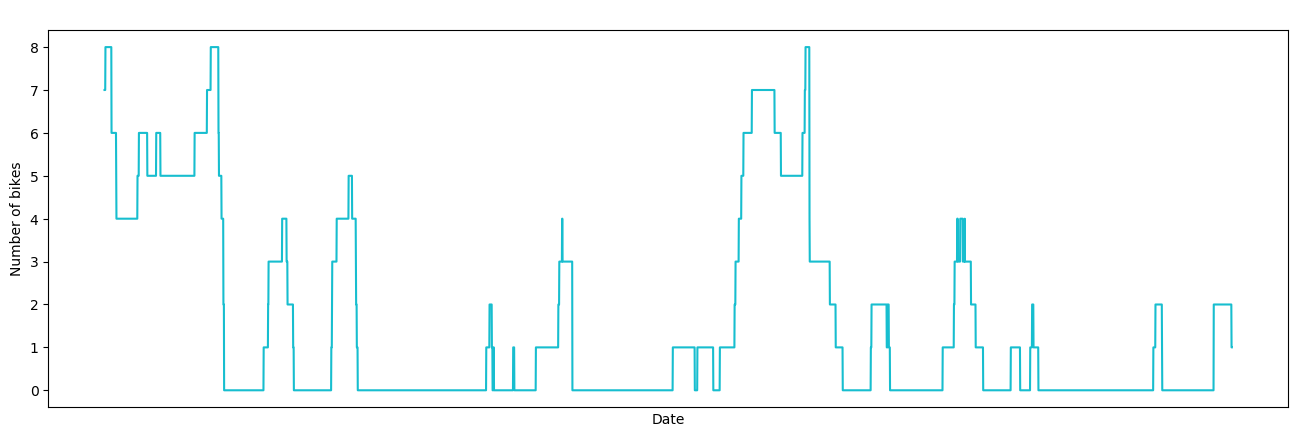

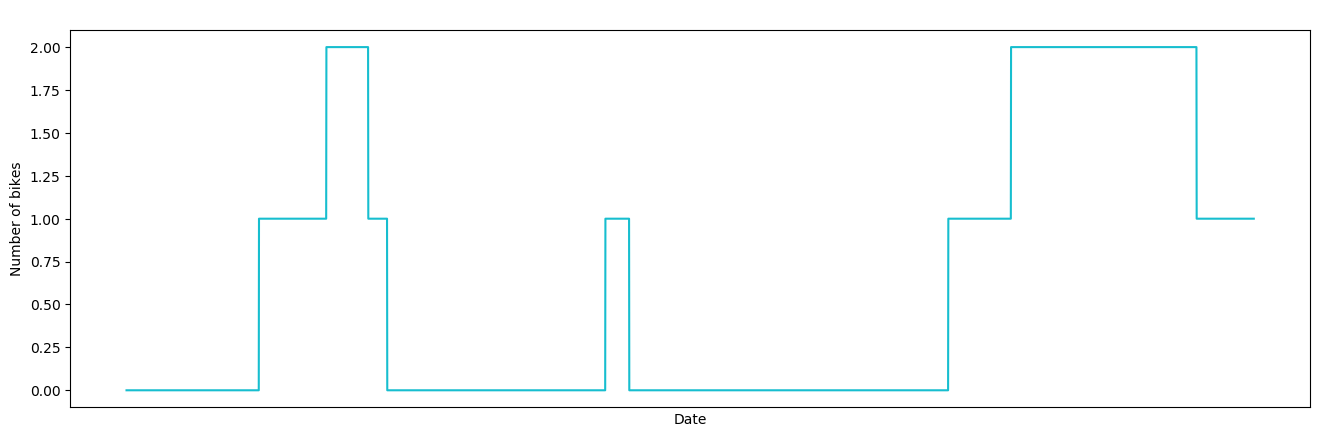

In [257]:
for i in full_stations:
    plot_bikes(datastore['bike_stations'][i]['empty_slots'], x=big_df.iloc[2:,].time, y=datastore['bike_stations'][i]['empty_slots'], title=' ')    

### Predicting demand

Predicting is important for effectively designing City Bikes locations and understanding where future bike stations should be installed. 

In [98]:
from scipy.stats import gaussian_kde    # kernel-density estimate
import statsmodels.api as sm            # for representing result statistics

In [99]:
timestamps = datastore['timestamps'][2016::12]
stations = datastore['bike_stations']
scooters = datastore['scooters'][2016::12]

In [100]:
print(len(scooters))

234


The weather data consists of air temperature and cloud amount for every 10 minutes of each day. The data is downloaded from the website of Finnish Meteorological Institute https://en.ilmatieteenlaitos.fi/download-observations#!/ Since CityBikes data is accessed at 5-minutes temporal resolution, to achive compatibility the gaps were filled propagating last valid observation forward. 

In [101]:
weather = pd.read_csv('weather_data.csv')
weather = weather.fillna(method='ffill')                            # propagates last valid observation forward
weather_arr = np.array(weather.iloc[118+1008:2527:6])[:,-2:].astype(float) # cutting so it matches with our dataset length 

In [102]:
print(weather_arr.shape)

(234, 2)


We create two arrays:
+ **X**: array with shape (234, 455, 40)
+ **y**: array with shape (234, 455, 2)

In [103]:
# weekday, hour, scooter density, station_mean, weather, last_week, mean_day, +3 for slots
X = np.zeros((len(timestamps), len(stations), 7 + 24 + 1 + 1 + 2 + 1 + 1 + 3))
y = np.zeros((len(timestamps), len(stations), 2)) # bikes, slots

The mean of bikes for each station is expected to be the main predictor. 

In [104]:
for num, t in enumerate(timestamps):
    dt = datetime.fromtimestamp(t)
    weekday, hour = dt.weekday(), dt.hour  # creates categorical variables for days of the week and hours of the day
    densities = gaussian_kde(np.array(scooters[num]).T).pdf(station_coords)
    # estimates the probability density function for scooters variable 
    # and evaluates the estimated pdf on a provided set of points (locations)
    last_week = [station['bikes'][num*12] for station in stations]
    last_week_slots = [station['empty_slots'][num*12] for station in stations]
    station_means = np.array([np.mean(station['bikes'][num*12:num*12+2017:288]) for station in stations])
    station_means_slots = np.array([np.mean(station['empty_slots'][num*12:num*12+2017:288]) for station in stations])
    day_means = np.array([np.mean(station['bikes'][num*12:num*12+288]) for station in stations])
    day_means_slots = np.array([np.mean(station['empty_slots'][num*12:num*12+288]) for station in stations])
    #X[num, :, weekday] = 1
    X[num, :, 0] = 1 if weekday > 4 else 0  # the next lines fill in array with zeros created for X and y
    X[num, :, 7+hour] = 1
    X[num, :, 31] = densities
    X[num, :, 32] = station_means
    X[num, :, 33:35] = weather_arr[num]
    X[num, :, 35] = last_week
    X[num, :, 36] = day_means
    X[num, :, 37] = last_week_slots
    X[num, :, 38] = station_means_slots
    X[num, :, 39] = day_means_slots
    y[num, :, 0] = [station['bikes'][num*12+2016] for station in stations]
    y[num, :, 1] = [station['empty_slots'][num*12+2016] for station in stations]
    if num % 100 == 0:
        print(num) # just for process tracking

0
100
200


Now we want to reshape arrays to use it in our regression model.

In [105]:
X = X.reshape((-1, 7 + 24 + 1 + 1 + 2 + 1 + 1 + 3)) # -1 stands for length of the array is set by numpy, providing we want 40 columns
y = y.reshape((-1, 2))  # ..., providing we want 2 column

In [106]:
print(X.shape)
print(y.shape)

(106470, 40)
(106470, 2)


### OLS regression model

In [123]:
import statsmodels.api as sm # OLS regression with a constant 

In [125]:
sm_m_nbikes = sm.OLS(y[:,0], sm.add_constant(X))

In [126]:
sm_m_slots = sm.OLS(y[:,1], sm.add_constant(X))

In [127]:
print(sm_m_nbikes.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     6696.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:38:39   Log-Likelihood:            -3.2187e+05
No. Observations:              106470   AIC:                         6.438e+05
Df Residuals:                  106436   BIC:                         6.441e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3382      0.064      5.265      0.0

In [128]:
print(sm_m_slots.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                 1.184e+04
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:38:55   Log-Likelihood:            -2.8454e+05
No. Observations:              106470   AIC:                         5.692e+05
Df Residuals:                  106436   BIC:                         5.695e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1384      0.045     -3.060      0.0

The linear regression catches **68\%** of variance in number of bikes and **79\%** of variance in number of slots.  
 **Scooter density, specific means, days of the week and lags** are the most meaningfull to our model (p-values are close to zero). 

### RF regression model

In [119]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

Random Forest regression model without tuning parameters

In [120]:
model_rf = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)

In [144]:
results_rf_nbikes = model_rf.fit(X, y[:,0])

In [145]:
results_rf_nbikes.score(X, y[:,0])

0.5909025202457532

In [146]:
results_rf_slots = model_rf.fit(X, y[:,1])

In [147]:
results_rf_slots.score(X, y[:,1])

0.7007106004795871

We use the grid search cross validation method to determine the optimal values to be used.

In [129]:
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),                                             # grid-search
    param_grid={'max_depth': range(3,7), 'n_estimators': (10, 50, 100, 500)},
    cv=5, 
    scoring='neg_mean_squared_error', 
    verbose=10, 
    n_jobs=-1)

In [130]:
grid_result = gsc.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 70.6min finished


In [131]:
best_params = grid_result.best_params_

In [152]:
best_params

{'max_depth': 6, 'n_estimators': 50}

In [132]:
model_rf2 = RandomForestRegressor(max_depth=best_params["max_depth"], 
                                  n_estimators=best_params["n_estimators"], 
                                  random_state=False, verbose=False)

In [148]:
results_rf2_nbikes = model_rf2.fit(X, y[:,0])

In [149]:
results_rf2_nbikes.score(X, y[:,0])

0.7008997237719374

In [150]:
results_rf2_slots = model_rf2.fit(X, y[:,1])

In [151]:
results_rf2_slots.score(X, y[:,1])

0.7919206132270802

In [134]:
scores = cross_val_score(model_rf2, X, y, cv=10, scoring='neg_mean_absolute_error')    # cross-validation

In [135]:
scores

array([-3.31997063, -3.1246933 , -2.9943726 , -3.01958097, -3.12713322,
       -2.99821264, -3.32766911, -3.30276077, -3.13938564, -3.00358861])